# DM - CA1 - Mohamad Taha Fakharian
In this computer assignment, we're going to preprocess a dataset for covid history based on countries and display them to find some correlation between them and conclude some facts.

So let's start!

First we need to import some useful libraries for data preprocessing:

In [32]:
# Useful libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Data Preprocessing
Let's start with data preprocessing. First we need to save the dataset in a Pandas DataFrame and get a quick look at it:

In [33]:
covid = pd.read_csv('CA1_Dataset.csv')
covid.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN


## Q1
Let's see how many rows are NA for each column in our dataset:

In [34]:
pd.set_option('display.max_rows',None)
print(covid.isna().sum())

iso_code                                           0
continent                                       9917
location                                           0
date                                               0
total_cases                                     3030
new_cases                                       3172
new_cases_smoothed                              5156
total_deaths                                   20843
new_deaths                                     20803
new_deaths_smoothed                            22902
total_cases_per_million                         3785
new_cases_per_million                           3927
new_cases_smoothed_per_million                  5905
total_deaths_per_million                       21585
new_deaths_per_million                         21545
new_deaths_smoothed_per_million                23638
reproduction_rate                              40569
icu_patients                                  142246
icu_patients_per_million                      

Let's replace them with appropriate values. As you can see, there are two non-numeric columns listed above: test_units and continent.

For continent, NA values are for rows which their locations are not really specific, like International or Africa(their records are not location-specific). For each NA value in continent's column, we'll check if its location is name of a continent or not; If it is, we'll fill NA will its location value. Otherwise, the continent is undefined and we'll fill it with UNDEFINED value.

For test_units, we had a great approach for filling NA values: For each NA value in test_units column, we check whether rows with same location have any non-NA value for test_units column: If there is any, we would fill NA with mode of that column with same location as that record. Otherwise, we would fill NA with mode of that column in total dataset. This approach can be applied for other columns too. It's a better replacement method than the traditional one, because it uses records for same location. We don't use this approach for this dataset, because it's too much time-consuming. The code for this approach is commented in the cell below. We'll use the traditional method so(mode of total dataset).

For numeric columns, there are two kind of columns: Daily stat like new cases and overall stats like population. For daily stat, since they're important in estimations and can be inaccurate if filled by mean of that column(for example, aggregation on new deaths after filling NA can be more than that country's population), we'll fill it with zero. For other stats, we first check if ratio of missing values to total records isn't that big. If it's really big(like 0.9 or even bigger), we'll fill NA with a constant like $-\infty$(because there isn't sufficient data for us to predict the missing value).Otherwise, we'll fill it with mean of that column.

Pay attention! There are other methods for filling NA like decision trees. Sufficient data and time complexity is a big problem, so methods mentioned above are good for this dataset.

Let's fill NA values with this methods:

In [35]:
from pandas.api.types import is_numeric_dtype
unique_continent = covid['continent'].unique()

ACCEPTABLE_MISSING_PERCENTAGE = 0.9
total = len(covid.index)

for i in covid.columns[covid.isnull().any(axis=0)]:
    if is_numeric_dtype(covid[i]):
        if i.startswith('new') or i.startswith('total'):
            covid[i].fillna(0, inplace=True)
        elif covid[i].isna().sum() / total > ACCEPTABLE_MISSING_PERCENTAGE:
            covid[i].fillna(-np.inf, inplace=True)
        else:
            covid[i].fillna(covid[i].mean(), inplace=True)
    else:
        if i == 'continent':
            covid['continent'] = covid.apply(
                lambda row: row['location'] if (pd.isna(row['continent']) and (row['location'] in unique_continent)) 
                else ('UNDEFINED' if pd.isna(row['continent'])
                else row['continent']) , axis=1)
        else:
            covid[i].fillna(covid[i].mode()[0], inplace=True)
            # covid['tests_units'] = covid.apply(
            #      lambda row : covid['tests_units'].mode()[0] if (covid[covid['location'] == row['location']]['tests_units'].isnull().values.all())
            #     else (covid[covid['location'] == row['location']]['tests_units'].mode()[0] if pd.isna(row['tests_units'])
            #     else row['tests_units']), axis = 1


Finally, let's make sure that no more NA value is remained:

In [36]:
print(covid.isna().sum())

iso_code                                      0
continent                                     0
location                                      0
date                                          0
total_cases                                   0
new_cases                                     0
new_cases_smoothed                            0
total_deaths                                  0
new_deaths                                    0
new_deaths_smoothed                           0
total_cases_per_million                       0
new_cases_per_million                         0
new_cases_smoothed_per_million                0
total_deaths_per_million                      0
new_deaths_per_million                        0
new_deaths_smoothed_per_million               0
reproduction_rate                             0
icu_patients                                  0
icu_patients_per_million                      0
hosp_patients                                 0
hosp_patients_per_million               

In [37]:
covid.to_csv('Completed.csv')

## Q2
Now we want to get a better sense of data for each country. Let's aggregate new_cases, new_deaths and location columns for each country by date. For aggregation of new_cases and new_deaths, we'll use sum but for population, since its value is same for rows with same location(country), we'll use min function. So let's start:

In [38]:
pd.reset_option('display.max_rows')

In [39]:
summarized = covid[["location", "new_cases", "new_deaths", "new_vaccinations"]]
summarized = summarized.groupby(by=["location"]).sum()

summarized = summarized.join(covid[["location", "population"]].groupby(by=["location"]).min())
summarized

,new_cases,new_deaths,new_vaccinations,population
location,,,,
Afghanistan,174081.0,7617.0,1.374200e+04,3.983543e+07
Africa,11230524.0,248668.0,5.818190e+08,1.373486e+09
Albania,271825.0,3474.0,1.415150e+06,2.872934e+06
Algeria,265079.0,6843.0,1.707860e+05,4.461663e+07
Andorra,38249.0,151.0,4.802000e+03,7.735400e+04
...,...,...,...,...
Wallis and Futuna,454.0,7.0,0.000000e+00,1.109400e+04
World,439011701.0,5946817.0,1.122516e+10,7.874966e+09
Yemen,11772.0,2135.0,0.000000e+00,3.049064e+07


In [40]:
summarized.to_csv('Summarized.csv')

## Q3
To add Jalali date to dataframe, we use 'jdatetime' library. Unfortunately, jdatetime library doesn't work with Numpy and Pandas library and thus, we can't use vectorization to calculate Jalali date. Thus, we'll loop over rows and calculate Jalali date for each row: 

In [41]:
import jdatetime
covid['date'] = pd.to_datetime(covid['date'])
covid['jalali_date'] = covid['date']

for index, row in covid.iterrows():
    y, m , d = row['date'].year, row['date'].month, row['date'].day
    covid.at[index, 'jalali_date'] = str(jdatetime.date.fromgregorian(day=int(d),month=int(m),year=int(y)))

In [42]:
covid

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million,jalali_date
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,0.000,0.0,0.0,0.000,...,32.778255,37.746,0.5,64.83,0.511,-inf,-inf,-inf,-inf,1398-12-05
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,0.000,0.0,0.0,0.000,...,32.778255,37.746,0.5,64.83,0.511,-inf,-inf,-inf,-inf,1398-12-06
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,0.000,0.0,0.0,0.000,...,32.778255,37.746,0.5,64.83,0.511,-inf,-inf,-inf,-inf,1398-12-07
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,0.000,0.0,0.0,0.000,...,32.778255,37.746,0.5,64.83,0.511,-inf,-inf,-inf,-inf,1398-12-08
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,0.000,0.0,0.0,0.000,...,32.778255,37.746,0.5,64.83,0.511,-inf,-inf,-inf,-inf,1398-12-09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165631,ZWE,Africa,Zimbabwe,2022-02-26,235803.0,336.0,368.429,5393.0,1.0,1.000,...,30.700000,36.791,1.7,61.49,0.571,-inf,-inf,-inf,-inf,1400-12-07
165632,ZWE,Africa,Zimbabwe,2022-02-27,235803.0,0.0,350.143,5393.0,0.0,1.000,...,30.700000,36.791,1.7,61.49,0.571,-inf,-inf,-inf,-inf,1400-12-08
165633,ZWE,Africa,Zimbabwe,2022-02-28,236380.0,577.0,401.286,5395.0,2.0,1.286,...,30.700000,36.791,1.7,61.49,0.571,-inf,-inf,-inf,-inf,1400-12-09
165634,ZWE,Africa,Zimbabwe,2022-03-01,236871.0,491.0,413.000,5395.0,0.0,1.000,...,30.700000,36.791,1.7,61.49,0.571,-inf,-inf,-inf,-inf,1400-12-10


In [43]:
covid.to_csv('Jalali.csv')

## Q4
To find redundant features in dataframe, we can calculate correlation between features, which is known as correlation matrix. Let's calculate correlation matrix! 

In [44]:
covid.corr()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
total_cases,1.000000,0.806677,0.827899,0.968956,0.726685,0.747316,0.104767,0.032705,0.043368,0.137671,...,-0.002716,-0.005809,0.025074,-0.004761,0.010728,0.029702,0.802190,0.139572,0.034064,0.228241
new_cases,0.806677,1.000000,0.976958,0.735240,0.668096,0.654269,0.097389,0.088765,0.098912,0.103075,...,0.002898,-0.001433,0.020072,0.002557,0.012515,0.028335,0.464078,0.090745,0.092382,0.124742
new_cases_smoothed,0.827899,0.976958,1.000000,0.749612,0.663865,0.673995,0.101359,0.078399,0.101462,0.105567,...,0.002698,-0.001564,0.020375,0.002142,0.012423,0.028472,0.509117,0.075321,0.070259,0.127365
total_deaths,0.968956,0.735240,0.749612,1.000000,0.781224,0.803281,0.085529,0.017392,0.022912,0.156600,...,-0.006089,-0.006023,0.030088,-0.006634,0.010865,0.030726,0.928284,0.338096,0.110488,0.370520
new_deaths,0.726685,0.668096,0.663865,0.781224,1.000000,0.975575,0.031455,0.016238,0.017744,0.085165,...,-0.006418,-0.000462,0.032785,-0.003287,0.009868,0.032106,0.493040,0.301056,0.395089,0.193819
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
human_development_index,0.029702,0.028335,0.028472,0.030726,0.032106,0.032645,0.343099,0.158589,0.199781,0.326067,...,0.483810,0.082491,0.447246,0.468142,0.847106,1.000000,-0.102242,-0.347135,-0.290497,-0.231463
excess_mortality_cumulative_absolute,0.802190,0.464078,0.509117,0.928284,0.493040,0.655323,0.169916,0.008444,0.018781,0.376935,...,-0.122511,-0.115914,0.102151,-0.168047,-0.195392,-0.102242,1.000000,0.397512,0.167042,0.445995
excess_mortality_cumulative,0.139572,0.090745,0.075321,0.338096,0.301056,0.254753,0.232222,0.057043,0.041999,0.651316,...,-0.261507,-0.066339,0.203881,-0.252829,-0.253115,-0.347135,0.397512,1.000000,0.551706,0.738794
excess_mortality,0.034064,0.092382,0.070259,0.110488,0.395089,0.322358,0.100555,0.118010,0.117073,0.264369,...,-0.119547,0.052966,0.145492,-0.111678,-0.257628,-0.290497,0.167042,0.551706,1.000000,0.382483


as you can see, some of features are correlated and are saved redundantly. For example, look at correlation of new_cases and total_cases. Their correlation shows that using new_cases, we can calculate total_cases from that, which is clearly true. In particular, for each feature in dataframe, if that feature could be calculated using some function(like sum or max) and other features, we can drop that feature, since it's redundant feature. In this dataframe, 'total' features can be dropped, according to this explanation. 

## Q5
Now we'll get Iran's dataframe from original dataframe:

In [45]:
iran = covid[covid['location'] == 'Iran']
iran

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million,jalali_date
71639,IRN,Asia,Iran,2020-02-19,2.0,2.0,0.000,2.0,2.0,0.000,...,21.1,50.790872,1.5,76.68,0.783,-inf,-inf,-inf,-inf,1398-11-30
71640,IRN,Asia,Iran,2020-02-20,5.0,3.0,0.000,2.0,0.0,0.000,...,21.1,50.790872,1.5,76.68,0.783,-inf,-inf,-inf,-inf,1398-12-01
71641,IRN,Asia,Iran,2020-02-21,18.0,13.0,0.000,4.0,2.0,0.000,...,21.1,50.790872,1.5,76.68,0.783,-inf,-inf,-inf,-inf,1398-12-02
71642,IRN,Asia,Iran,2020-02-22,28.0,10.0,0.000,5.0,1.0,0.000,...,21.1,50.790872,1.5,76.68,0.783,-inf,-inf,-inf,-inf,1398-12-03
71643,IRN,Asia,Iran,2020-02-23,43.0,15.0,0.000,8.0,3.0,0.000,...,21.1,50.790872,1.5,76.68,0.783,-2658.0,-4.14,2.79,-31.260011,1398-12-04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72377,IRN,Asia,Iran,2022-02-26,7030943.0,7039.0,15065.429,136390.0,224.0,227.429,...,21.1,50.790872,1.5,76.68,0.783,-inf,-inf,-inf,-inf,1400-12-07
72378,IRN,Asia,Iran,2022-02-27,7040467.0,9524.0,14002.143,136631.0,241.0,227.286,...,21.1,50.790872,1.5,76.68,0.783,-inf,-inf,-inf,-inf,1400-12-08
72379,IRN,Asia,Iran,2022-02-28,7051429.0,10962.0,12838.143,136838.0,207.0,223.143,...,21.1,50.790872,1.5,76.68,0.783,-inf,-inf,-inf,-inf,1400-12-09
72380,IRN,Asia,Iran,2022-03-01,7060741.0,9312.0,11015.143,137064.0,226.0,223.571,...,21.1,50.790872,1.5,76.68,0.783,-inf,-inf,-inf,-inf,1400-12-10


In [46]:
iran.to_csv('Iran.csv')

## Q6
Let's extract month from date and add a month column to iran's dataframe:

In [47]:
iran['month'] = iran['date'].dt.month
iran

/home/taha/.local/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million,jalali_date,month
71639,IRN,Asia,Iran,2020-02-19,2.0,2.0,0.000,2.0,2.0,0.000,...,50.790872,1.5,76.68,0.783,-inf,-inf,-inf,-inf,1398-11-30,2
71640,IRN,Asia,Iran,2020-02-20,5.0,3.0,0.000,2.0,0.0,0.000,...,50.790872,1.5,76.68,0.783,-inf,-inf,-inf,-inf,1398-12-01,2
71641,IRN,Asia,Iran,2020-02-21,18.0,13.0,0.000,4.0,2.0,0.000,...,50.790872,1.5,76.68,0.783,-inf,-inf,-inf,-inf,1398-12-02,2
71642,IRN,Asia,Iran,2020-02-22,28.0,10.0,0.000,5.0,1.0,0.000,...,50.790872,1.5,76.68,0.783,-inf,-inf,-inf,-inf,1398-12-03,2
71643,IRN,Asia,Iran,2020-02-23,43.0,15.0,0.000,8.0,3.0,0.000,...,50.790872,1.5,76.68,0.783,-2658.0,-4.14,2.79,-31.260011,1398-12-04,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72377,IRN,Asia,Iran,2022-02-26,7030943.0,7039.0,15065.429,136390.0,224.0,227.429,...,50.790872,1.5,76.68,0.783,-inf,-inf,-inf,-inf,1400-12-07,2
72378,IRN,Asia,Iran,2022-02-27,7040467.0,9524.0,14002.143,136631.0,241.0,227.286,...,50.790872,1.5,76.68,0.783,-inf,-inf,-inf,-inf,1400-12-08,2
72379,IRN,Asia,Iran,2022-02-28,7051429.0,10962.0,12838.143,136838.0,207.0,223.143,...,50.790872,1.5,76.68,0.783,-inf,-inf,-inf,-inf,1400-12-09,2
72380,IRN,Asia,Iran,2022-03-01,7060741.0,9312.0,11015.143,137064.0,226.0,223.571,...,50.790872,1.5,76.68,0.783,-inf,-inf,-inf,-inf,1400-12-10,3


## Q7
Now let's aggregate iran's dataframe by month in 2021!

Here, we'll drop 'date' and 'jalali_date' columns for aggregation(since they're meaningless for aggregation):

In [48]:
iran_2021 = iran[iran['date'].dt.year == 2021]
news = []
for column in iran_2021:
    if column.startswith('new'):
        news.append(column)
        
news.append('month')
iran_news = iran_2021[news].copy()
news.pop()
news.append('date')
news.append('jalali_date')
iran_others = iran_2021.drop(news, axis=1)

iran_news = iran_news.groupby(by="month").sum()
iran_others = iran_others.groupby(by="month").max()
iran_summarized = iran_news.join(iran_others)
iran_summarized

,new_cases,new_cases_smoothed,new_deaths,new_deaths_smoothed,new_cases_per_million,new_cases_smoothed_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,new_tests,new_tests_per_thousand,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
month,,,,,,,,,,,,,,,,,,,,,
1,192857.0,191987.285,2736.0,2899.717,2268.141,2257.909,32.178,34.102,699947.0,8.231,...,0.8,21.1,50.790872,1.5,76.68,0.783,116955.7,29.12,8.51,1375.484013
2,213170.0,208151.000,2114.0,2095.712,2507.034,2448.008,24.863,24.649,275851.0,3.243,...,0.8,21.1,50.790872,1.5,76.68,0.783,118220.6,26.82,9.64,1390.360156
3,254395.0,249951.002,2592.0,2575.569,2991.869,2939.607,30.485,30.292,271847.0,3.198,...,0.8,21.1,50.790872,1.5,76.68,0.783,121127.8,25.40,19.07,1424.550940
4,613513.0,581349.857,9093.0,8084.143,7215.358,6837.099,106.940,95.076,483352.0,5.686,...,0.8,21.1,50.790872,1.5,76.68,0.783,133699.8,25.68,63.35,1572.406795
5,414059.0,446317.573,8398.0,9098.854,4869.633,5249.018,98.768,107.011,0.0,0.000,...,0.8,21.1,50.790872,1.5,76.68,0.783,152611.8,27.39,63.64,1794.825657
6,291421.0,286083.287,4108.0,4275.714,3427.322,3364.546,48.310,50.285,123901.0,1.457,...,0.8,21.1,50.790872,1.5,76.68,0.783,160803.4,27.64,41.61,1891.164825
7,666451.0,617035.143,6366.0,5891.143,7837.948,7256.777,74.868,69.286,76729.0,0.902,...,0.8,21.1,50.790872,1.5,76.68,0.783,168133.4,27.44,29.96,1977.370951
8,1121055.0,1108662.715,17164.0,16160.286,13184.422,13038.678,201.858,190.058,1199426.0,14.105,...,0.8,21.1,50.790872,1.5,76.68,0.783,202062.4,31.05,158.99,2376.400644
9,594977.0,650810.142,12634.0,13715.144,6997.364,7654.000,148.587,161.300,2881556.0,33.889,...,0.8,21.1,50.790872,1.5,76.68,0.783,230300.4,33.91,120.50,2708.500042


In [49]:
iran_summarized.to_csv('Iran_Summarized.csv')

# Data Visualization
In this part, we're going to visualize dataframes calculated in previous part and conclude from them. Let's start!

We'll use 'seaborn' library for data visualization:

In [50]:
import seaborn as sns

## Q1
First we want to see which countries have had best and worst performance in controlling Corona Virus. We'll use total deaths per population for the measurement of performance and use a bar chart to see this rate among all countries. Let's go!

In [51]:
summarized_copy = summarized.copy()
summarized_copy = summarized_copy[['new_deaths', 'population']]
summarized_copy['deaths_per_population'] = summarized_copy['new_deaths'] / summarized_copy['population']
summarized_copy = summarized_copy.sort_values(by=['deaths_per_population'])
best = summarized_copy[:10]
best_over_zero = summarized_copy[summarized_copy['deaths_per_population'] > 0][:10]
worst = summarized_copy[-10:]

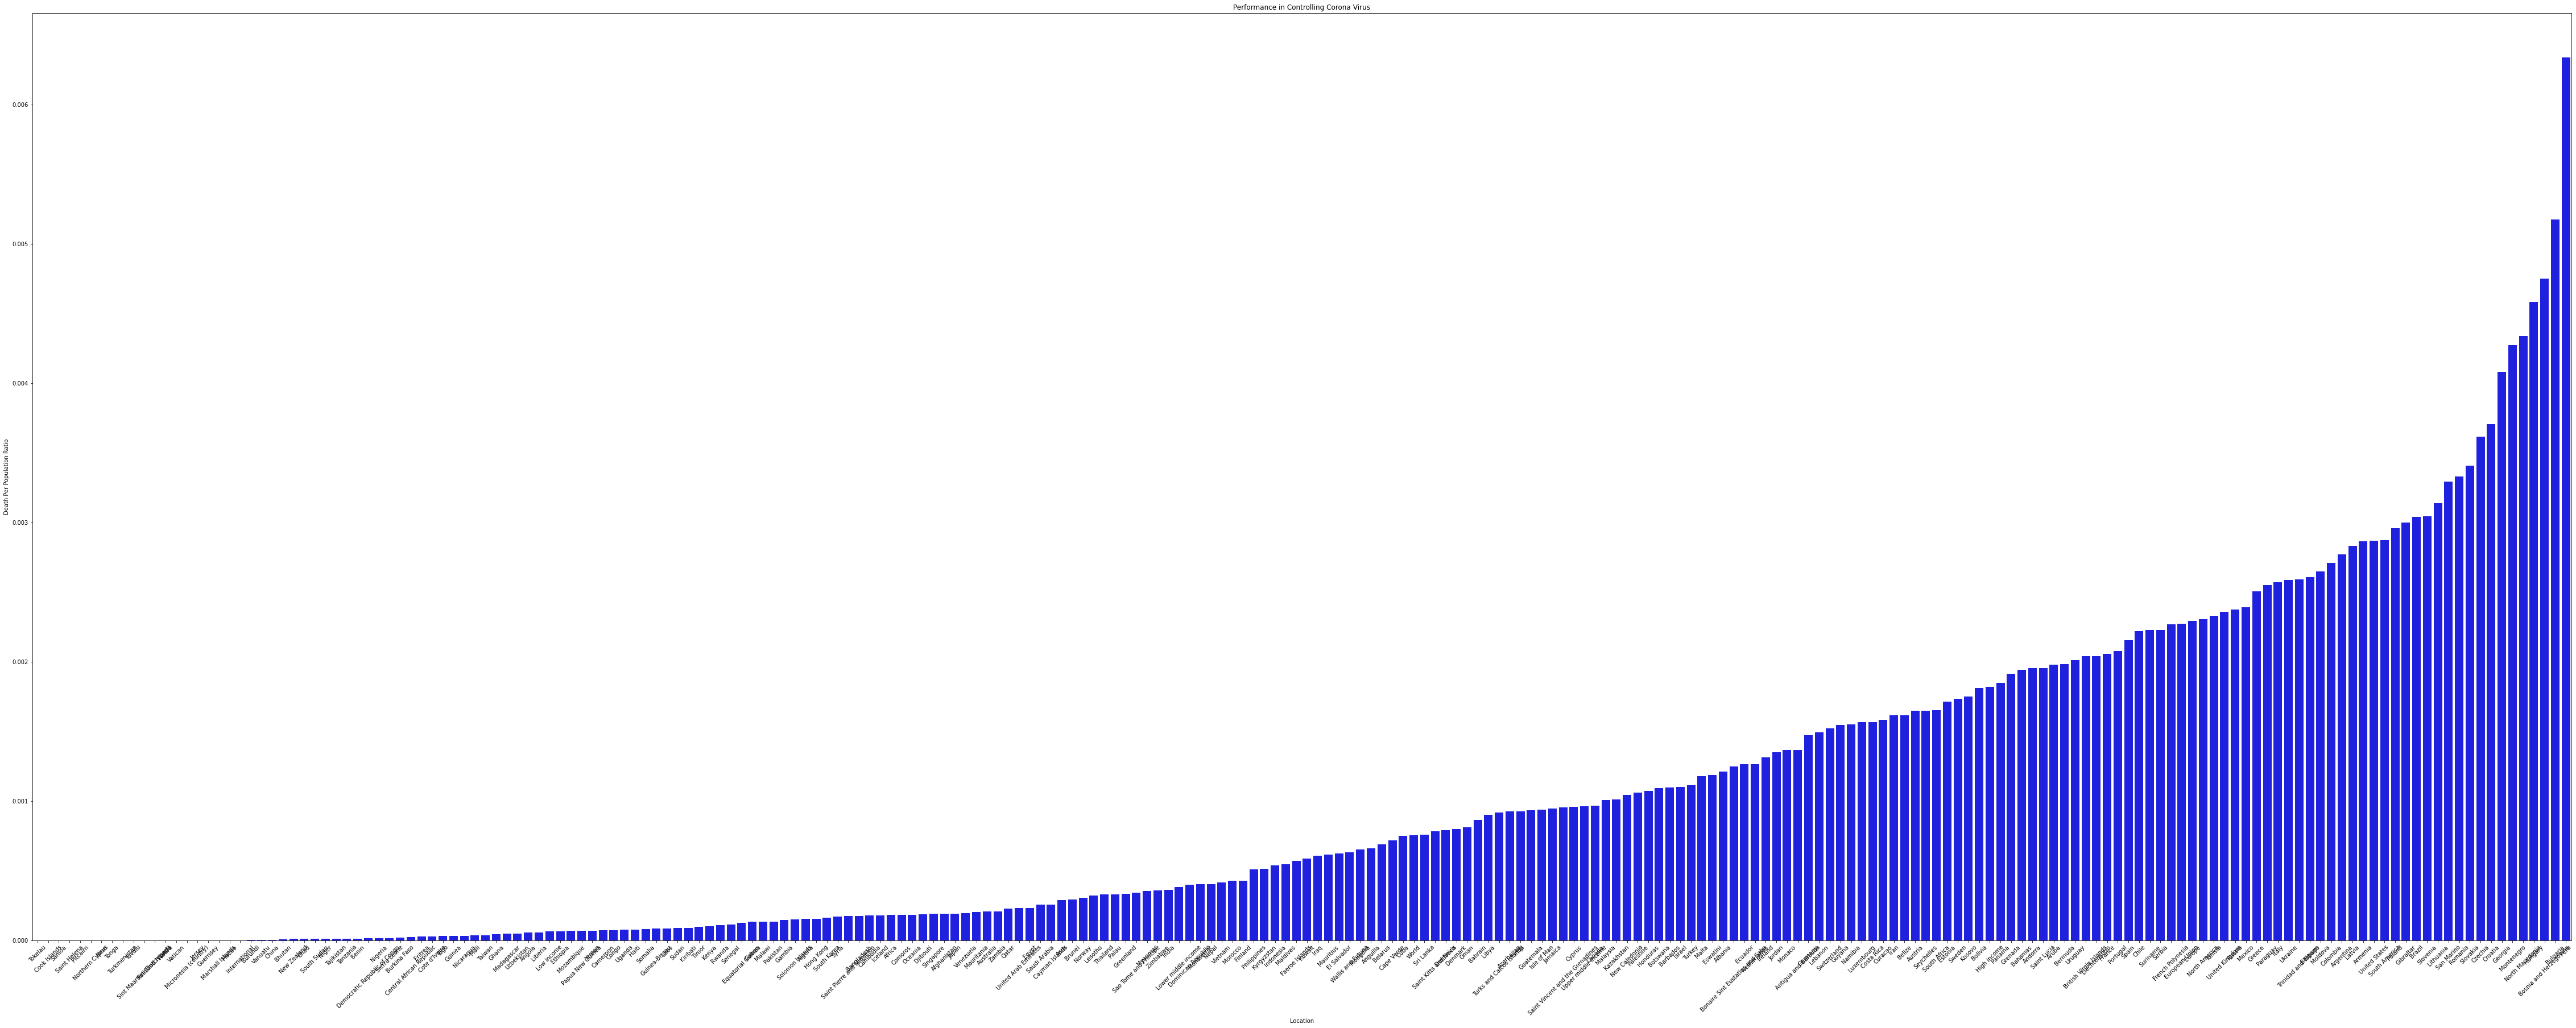

In [52]:
plt.figure(figsize=(80,30))
ax = sns.barplot(x=summarized_copy.index, y=summarized_copy['deaths_per_population'], color='b')
plt.xticks(rotation = 45)
ax.set_title("Performance in Controlling Corona Virus")
ax.set_xlabel('Location')
ax.set_ylabel('Death Per Population Ratio')
plt.show()

Let's see the results. Since for some countries, dataset may not have enough data for deaths, we get the best countries with ratio greater than zero too. In the following cells, you can see best and worst countries with their performances:

In [53]:
best

,new_deaths,population,deaths_per_population
location,,,
Tokelau,0.0,1.368000e+03,0.0
Cook Islands,0.0,1.757200e+04,0.0
Samoa,0.0,2.001440e+05,0.0
Saint Helena,0.0,6.095000e+03,0.0
Pitcairn,0.0,4.700000e+01,0.0
Northern Cyprus,0.0,1.474690e+08,0.0
Niue,0.0,1.614000e+03,0.0
Tonga,0.0,1.067590e+05,0.0
Turkmenistan,0.0,6.117933e+06,0.0


In [54]:
best_over_zero

,new_deaths,population,deaths_per_population
location,,,
International,15.0,1.474690e+08,1.017163e-07
Burundi,38.0,1.225543e+07,3.100667e-06
Vanuatu,1.0,3.144640e+05,3.180014e-06
China,4640.0,1.444216e+09,3.212816e-06
Bhutan,6.0,7.799000e+05,7.693294e-06
New Zealand,56.0,5.126300e+06,1.092406e-05
Chad,190.0,1.691498e+07,1.123264e-05
South Sudan,137.0,1.138138e+07,1.203721e-05
Niger,307.0,2.513081e+07,1.221608e-05


In [55]:
worst

,new_deaths,population,deaths_per_population
location,,,
Slovakia,18567.0,5449270.0,0.003407
Czechia,38771.0,10724553.0,0.003615
Croatia,15122.0,4081657.0,0.003705
Georgia,16231.0,3979773.0,0.004078
Montenegro,2683.0,628051.0,0.004272
North Macedonia,9036.0,2082661.0,0.004339
Hungary,44134.0,9634162.0,0.004581
Bosnia and Herzegovina,15506.0,3263459.0,0.004751
Bulgaria,35696.0,6896655.0,0.005176


To conclude, we can see that countries with better facilities in health, have had better performance in dealing with COVID-19.

## Q2
Now we want to see the effect of vaccination on number of deaths. To get a better sense, we'll sort countries by ratio of total vaccinations to population and from each quintile, we'll sample one country and finally, we'll plot a scatter plot to see the effect of vaccination on number of deaths. Let's go!

In [56]:
pd.set_option('display.max_rows',None)

summarized_copy = summarized.copy()
summarized_copy['first_ratio'] = (summarized_copy['new_vaccinations'] / summarized_copy['population']) 
summarized_copy['second_ratio'] = (summarized_copy['new_deaths'] / summarized_copy['population']) 

summarized_copy = summarized_copy.sort_values(by= 'first_ratio', ascending= False)

summarized_copy

,new_cases,new_deaths,new_vaccinations,population,first_ratio,second_ratio
location,,,,,,
Cuba,1070730.0,8497.0,3.065243e+07,1.131750e+07,2.708410,7.507843e-04
Gibraltar,15632.0,101.0,8.906400e+04,3.369100e+04,2.643555,2.997833e-03
Chile,3098110.0,42624.0,4.855777e+07,1.921236e+07,2.527423,2.218572e-03
Singapore,767663.0,1040.0,1.357254e+07,5.453600e+06,2.488730,1.906997e-04
Malta,71497.0,608.0,1.205547e+06,5.161000e+05,2.335879,1.178066e-03
South Korea,3691487.0,8394.0,1.192514e+08,5.130518e+07,2.324354,1.636092e-04
Denmark,2805858.0,4633.0,1.317204e+07,5.813302e+06,2.265845,7.969653e-04
Italy,12868066.0,155245.0,1.343115e+08,6.036747e+07,2.224899,2.571666e-03
Uruguay,846889.0,7005.0,7.622054e+06,3.485152e+06,2.187008,2.009955e-03


According to this dataframe, we'll choose Cuba, Sweden, Cambodia, India and Albania for visualization:

In [57]:
countries = ['Cuba', 'Sweden', 'Cambodia', 'India', 'Albania']

selected = summarized_copy.loc[countries]
selected

,new_cases,new_deaths,new_vaccinations,population,first_ratio,second_ratio
location,,,,,,
Cuba,1070730.0,8497.0,3.065243e+07,1.131750e+07,2.708410,0.000751
Sweden,2451464.0,17611.0,4.761600e+04,1.016016e+07,0.004687,0.001733
Cambodia,131004.0,3032.0,3.467897e+07,1.694645e+07,2.046386,0.000179
India,42945160.0,507015.0,1.708969e+09,1.393409e+09,1.226466,0.000364
Albania,271825.0,3474.0,1.415150e+06,2.872934e+06,0.492580,0.001209


For visualization, we'll use a scatter plot that shows the effect of vaccination on the number of deaths. The X-axis shows the ratio of total vaccination to population and Y-axis shows the ratio of total deaths to population. Let's see the result: 

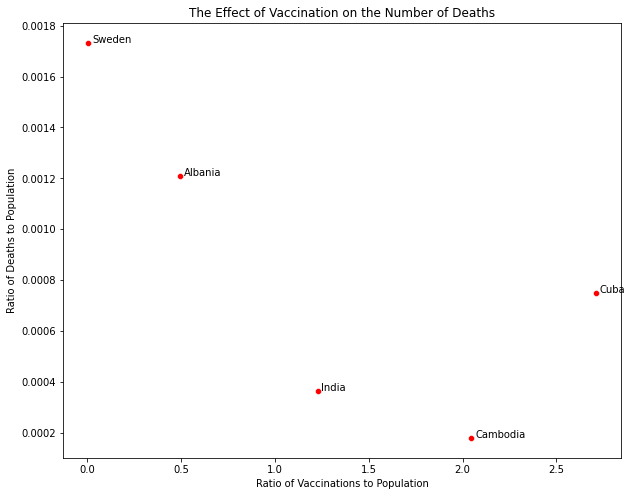

In [58]:
plt.figure(figsize=(10,8))
ax = sns.scatterplot(x=selected['first_ratio'], y=selected['second_ratio'], color = 'r')
for i, point in selected.iterrows():
    ax.text(point['first_ratio']+.02, point['second_ratio'], str(i))
ax.set_title("The Effect of Vaccination on the Number of Deaths")
ax.set_xlabel('Ratio of Vaccinations to Population')
ax.set_ylabel('Ratio of Deaths to Population')
plt.show()

As you can see, more vaccination can reduce the number of the deaths in a country in general. However, there are other factors that affect the number of deaths too. For example, Cuba has better ratio in vaccination, but worse result in ratio of controlling death. 

## Q3
Now we want to see speed of vaccination in different countries. We'll use total vaccinations in different months in 2021. To pick 5 countries for examination, we'll again use the previous dataframe and choose countries based on their vaccination ratio and continent.

In [59]:
summarized_copy 

,new_cases,new_deaths,new_vaccinations,population,first_ratio,second_ratio
location,,,,,,
Cuba,1070730.0,8497.0,3.065243e+07,1.131750e+07,2.708410,7.507843e-04
Gibraltar,15632.0,101.0,8.906400e+04,3.369100e+04,2.643555,2.997833e-03
Chile,3098110.0,42624.0,4.855777e+07,1.921236e+07,2.527423,2.218572e-03
Singapore,767663.0,1040.0,1.357254e+07,5.453600e+06,2.488730,1.906997e-04
Malta,71497.0,608.0,1.205547e+06,5.161000e+05,2.335879,1.178066e-03
South Korea,3691487.0,8394.0,1.192514e+08,5.130518e+07,2.324354,1.636092e-04
Denmark,2805858.0,4633.0,1.317204e+07,5.813302e+06,2.265845,7.969653e-04
Italy,12868066.0,155245.0,1.343115e+08,6.036747e+07,2.224899,2.571666e-03
Uruguay,846889.0,7005.0,7.622054e+06,3.485152e+06,2.187008,2.009955e-03


Here, we'll choose China(source of COVID-19), Argentina and Brazil from South America and Germany and Switzerland from Europe to see how different are speed of vaccination between countries in same continent and different vaccination ratio. We'll use a line plot for this purpose(to see the trend in time). Let's see the result!

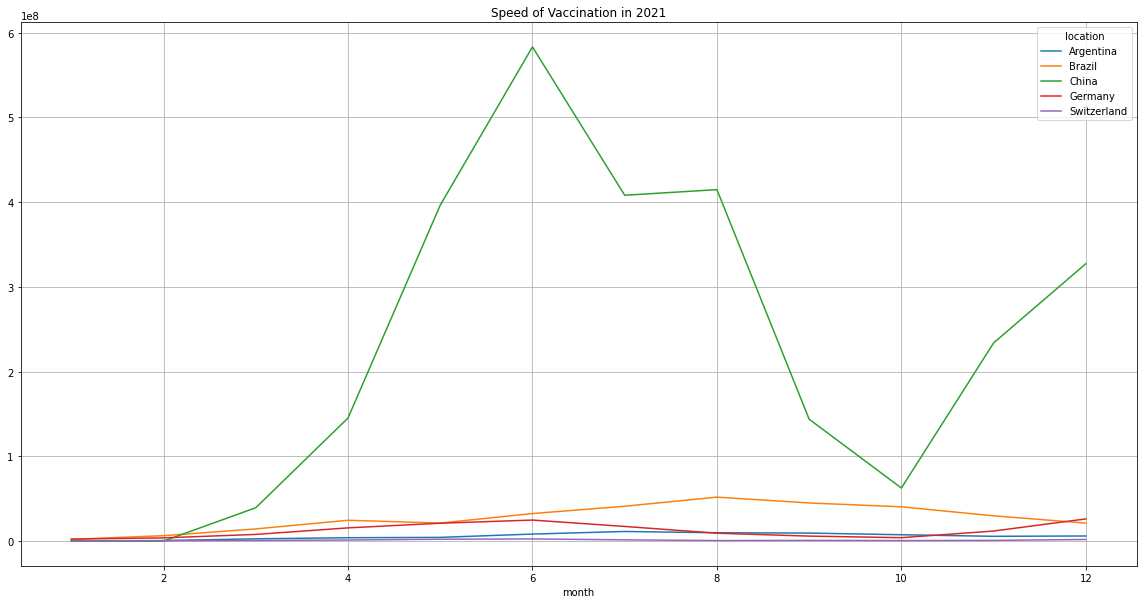

In [60]:
countries = ['China', 'Argentina', 'Brazil', 'Germany', 'Switzerland']

selected = covid[covid['location'].isin(countries)]
selected = selected[selected['date'].dt.year == 2021]
selected['month'] = selected['date'].dt.month
selected = selected.groupby(by=['location', "month"]).sum()

selected.reset_index().pivot('month','location','new_vaccinations').plot( title='Speed of Vaccination in 2021', grid=True, figsize=(20, 10))
plt.show()

As you can see, China's speed in vaccination changes dramatically over time(as the source of COVID-19) and typically has higher speed between other countries. In Europe, Germany has higher speed than Switzerland and their difference is obvious. This fact is also true for Argentina and Brazil in South America, too. Brazil has higher speed than Argentina. In general, countries with more population have higher speed in vaccination. We can also see that in some period of time, speed for countries decreases(probably because number of cases decreases at that time) and rises again(probably because of new type of COVID-19).

## Q4
Now, we want to see strictness trend in controlling COVID-19 in Iran. To see this, we'll use the aggregated dataframe for Iran's stats, which is aggregated on 2021's months. In this aggregation, maximum stringency index(a factor for strictness) in month is used. We'll use a line plot to see the trend. Let's see the result!

In [61]:
pd.reset_option('display.max_rows')

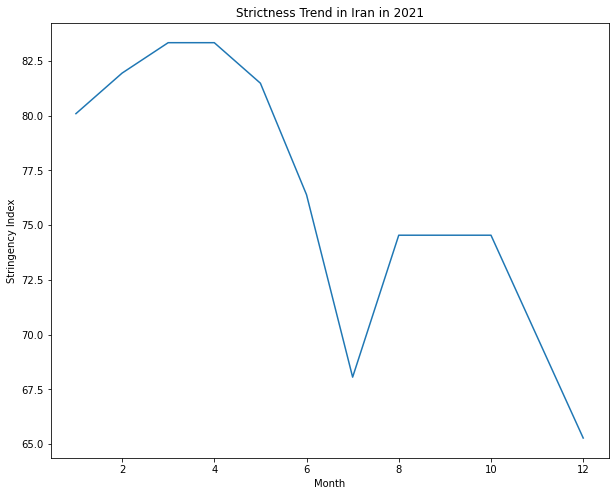

In [62]:
plt.figure(figsize=(10,8))
ax = sns.lineplot(x=iran_summarized.index, y=iran_summarized['stringency_index'])
ax.set_title("Strictness Trend in Iran in 2021")
ax.set_xlabel('Month')
ax.set_ylabel('Stringency Index')
plt.show()

As you can see, there are some rises and falls in the trend. Highest strictness level, according to plot, is achieved in April and it falls in the next 3 months, probably because more people is vaccinated and there is no new variant of COVID-19 virus. After that, there is another rise in the next 3 month and finally, it falls till the last month of the year. One of the reasons for this fall and rises can be the spread of new variants of COVID-19. Another reason can be with reduction in strictness, there can be higher probability that virus spread in the country and number of cases increase and the government decide to increase the stringency index again.

## Q5
Now we'll use boxplot to see the distribution of total deaths in the dataframe. Let's see the results:

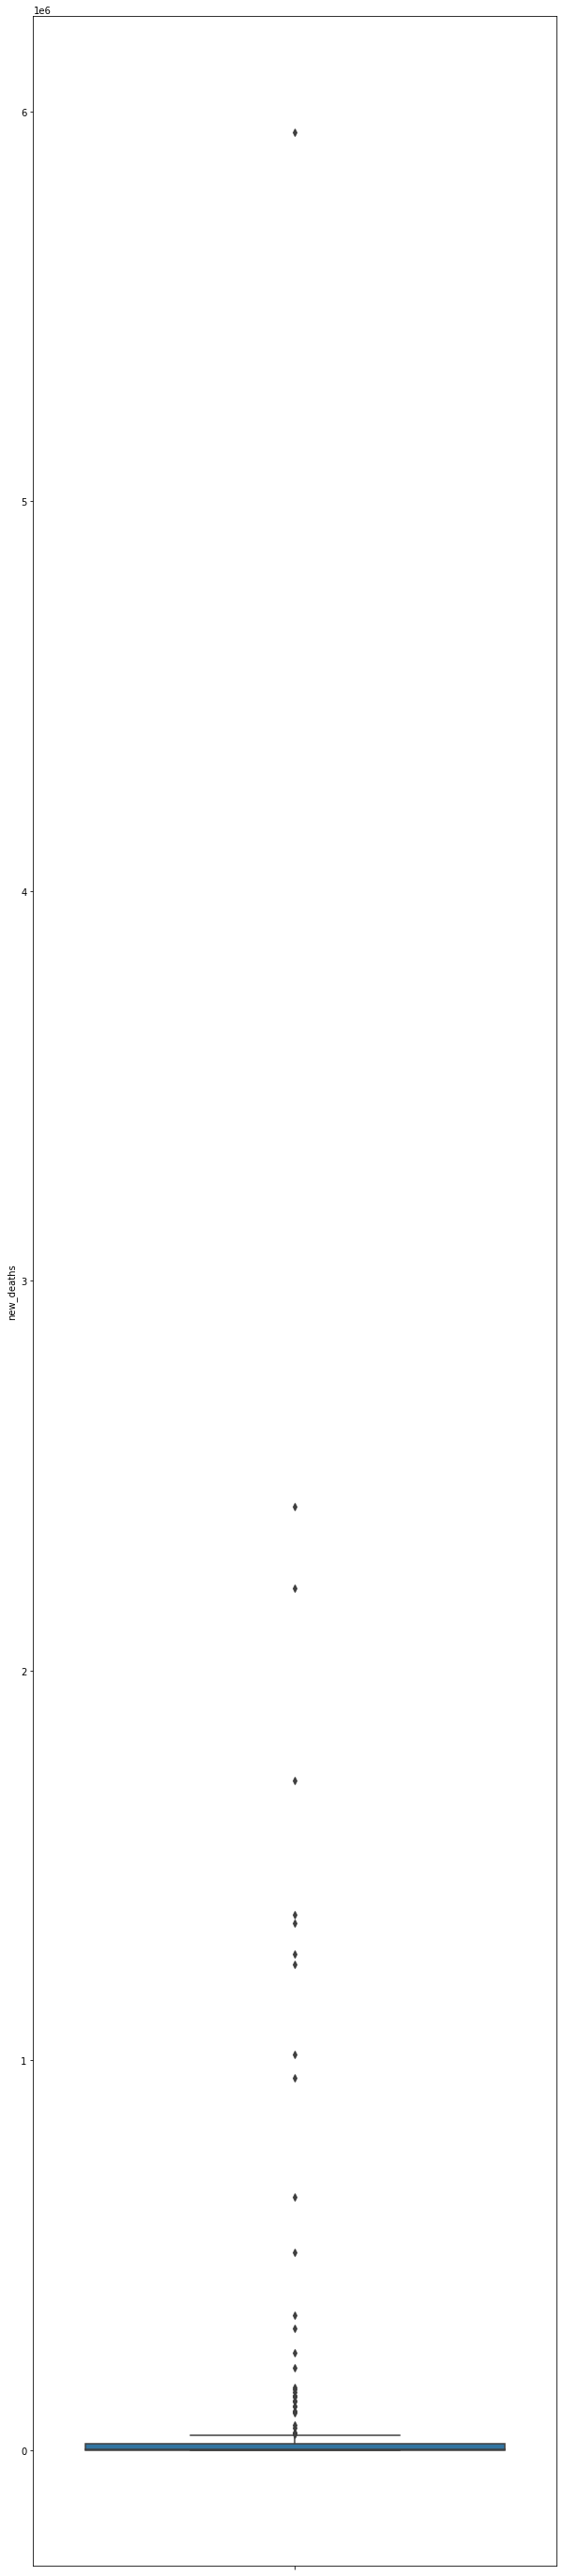

In [82]:
import plotly.express as px
plt.figure(figsize=(10,50))
sns.boxplot(y=summarized['new_deaths'])
plt.show()

As you can see, there are about 20 outliers in this box plot. To deal with with outliers, the simplest way is to ignore these countries. A better approach can be that instead of ignoring completely, choose some stats that doesn't affect estimations a lot from these outliers. Pay attention! The outliers have more population that others, which means that higher number of death is logical somehow. To see the skewness in the boxplot, first let's see the average value of deaths:

In [64]:
summarized['new_deaths'].mean()

104214.1050420168

According to mean and the shape of boxplot, we can say that there is a positive skew in the plot(plot is right-skewed). To see the name of locations that are outliers, we'll see top 20 countries in the number of deaths:

In [65]:
summarized.sort_values(by='new_deaths', ascending = False)[:20]

,new_cases,new_deaths,new_vaccinations,population
location,,,,
World,439011701.0,5946817.0,1.122516e+10,7.874966e+09
Upper middle income,118212049.0,2421471.0,4.804681e+09,2.513673e+09
High income,236393139.0,2211971.0,2.306054e+09,1.214930e+09
Europe,158815550.0,1717056.0,1.247823e+09,7.489630e+08
North America,93195128.0,1374621.0,1.030269e+09,5.965813e+08
Asia,117811418.0,1351250.0,7.544342e+09,4.678445e+09
Lower middle income,82588725.0,1271503.0,3.974325e+09,3.330653e+09
South America,54222621.0,1247285.0,7.462801e+08,4.342601e+08
European Union,110033392.0,1015772.0,8.184271e+08,4.471899e+08


## Q6
Now we want to see the impact of population density, median age, handwashing facilities, hospital beds per thousand and human development index on number of death and cases. To show this, we'll use a scatter plot for each pair of variables we want to find the correlation between(10 plots in total) and study the relation between them. First we need aggregate some variables for plots:

In [66]:
first_factors = ["population_density", "median_age", "handwashing_facilities", 
                 "hospital_beds_per_thousand", "human_development_index"]
second_factors = ["new_cases", "new_deaths"]
new_summarized = covid[["location"] + first_factors]

new_summarized = new_summarized.groupby(by="location").max()
new_summarized = summarized.join(new_summarized)
new_summarized

,new_cases,new_deaths,new_vaccinations,population,population_density,median_age,handwashing_facilities,hospital_beds_per_thousand,human_development_index
location,,,,,,,,,
Afghanistan,174081.0,7617.0,1.374200e+04,3.983543e+07,54.422000,18.600000,37.746000,0.500000,0.511000
Africa,11230524.0,248668.0,5.818190e+08,1.373486e+09,464.408404,30.568558,50.790872,3.027939,0.725595
Albania,271825.0,3474.0,1.415150e+06,2.872934e+06,104.871000,38.000000,50.790872,2.890000,0.795000
Algeria,265079.0,6843.0,1.707860e+05,4.461663e+07,17.348000,29.100000,83.741000,1.900000,0.748000
Andorra,38249.0,151.0,4.802000e+03,7.735400e+04,163.755000,30.568558,50.790872,3.027939,0.868000
...,...,...,...,...,...,...,...,...,...
Wallis and Futuna,454.0,7.0,0.000000e+00,1.109400e+04,464.408404,30.568558,50.790872,3.027939,0.725595
World,439011701.0,5946817.0,1.122516e+10,7.874966e+09,58.045000,30.900000,60.130000,2.705000,0.737000
Yemen,11772.0,2135.0,0.000000e+00,3.049064e+07,53.508000,20.300000,49.542000,0.700000,0.470000


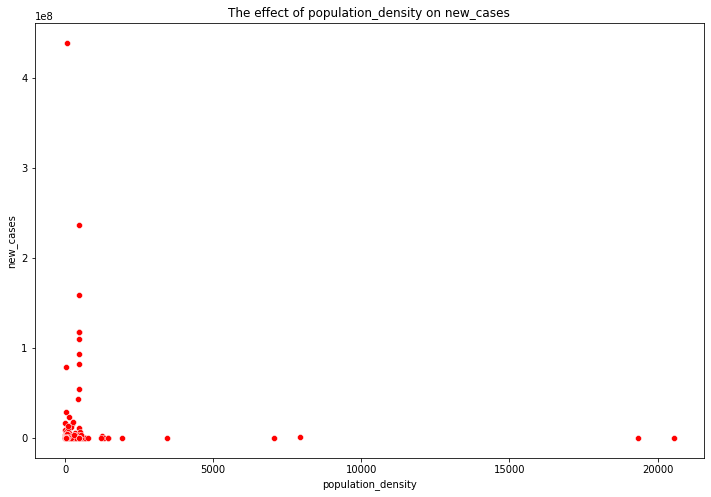

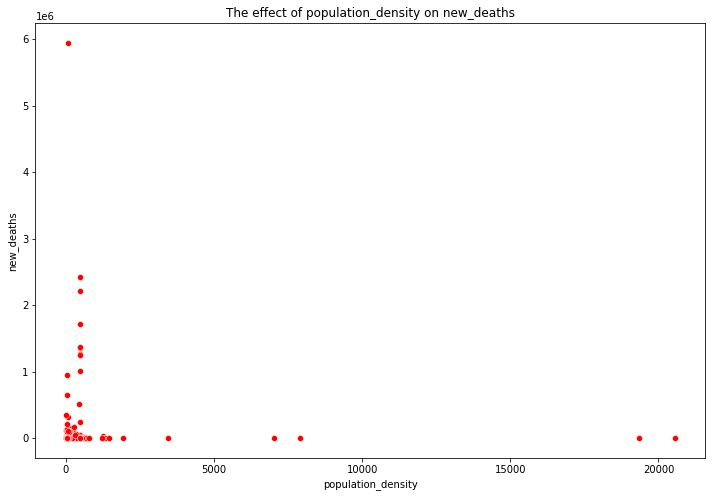

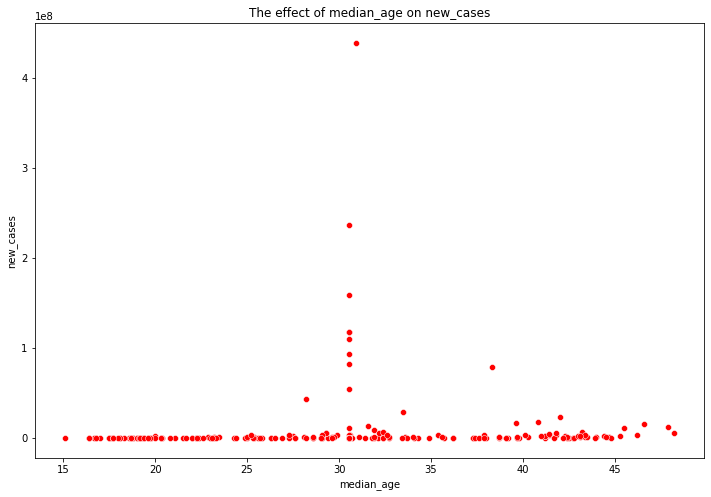

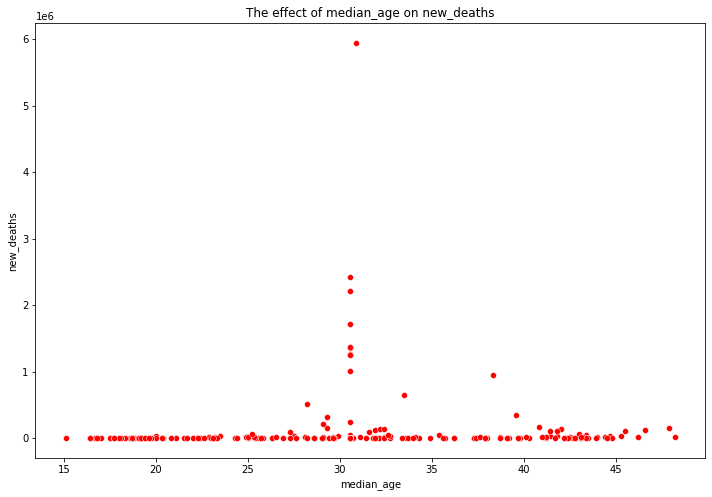

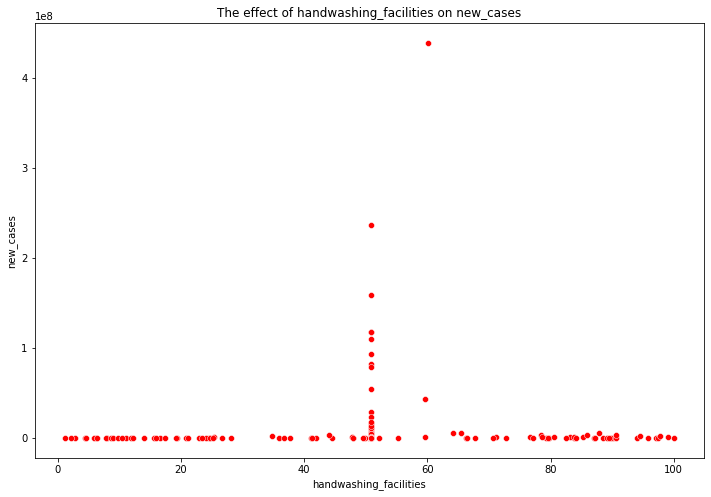

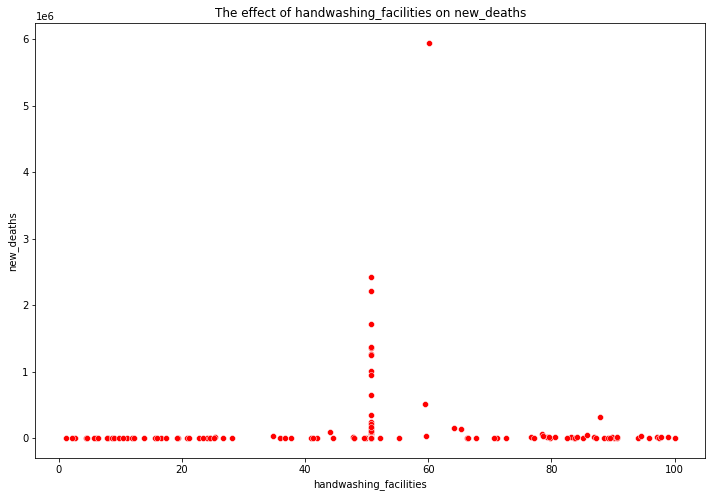

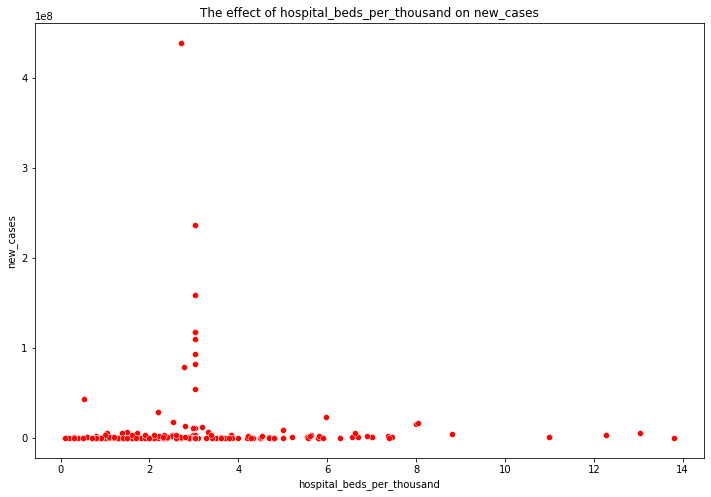

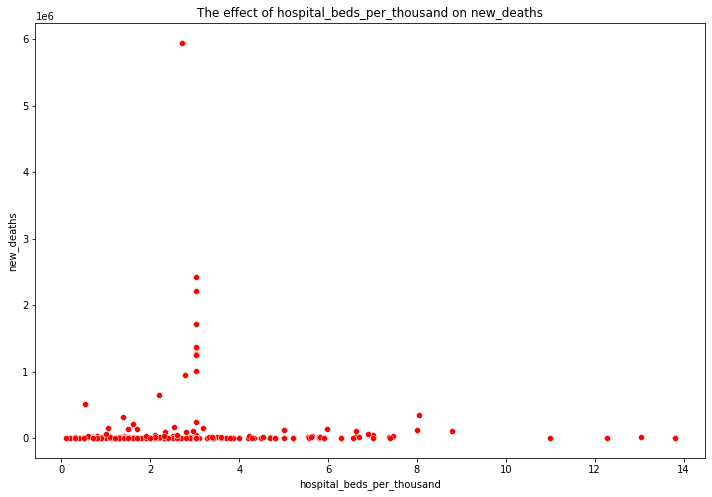

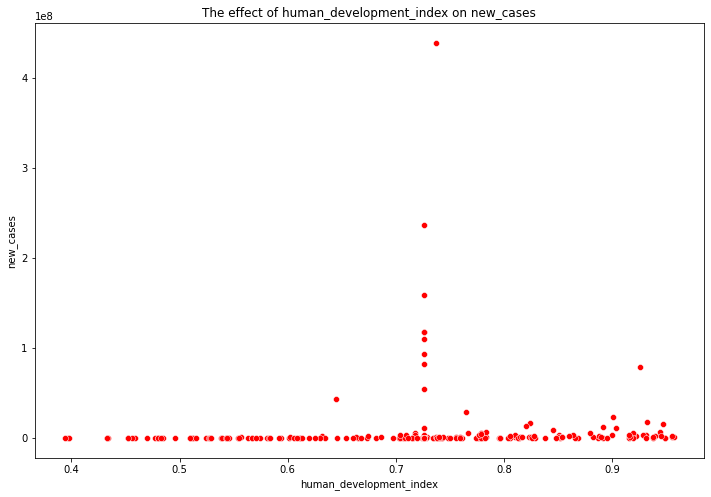

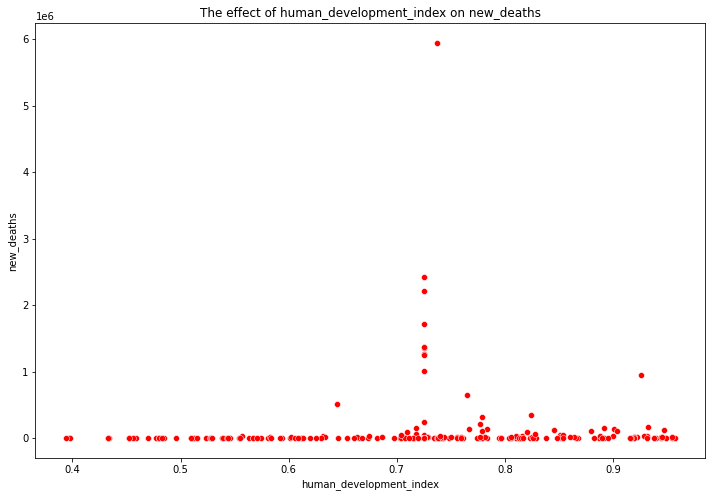

In [67]:
for first_factor in first_factors:
    for second_factor in second_factors:
        plt.figure(figsize=(12,8))
        ax = sns.scatterplot(x=new_summarized[first_factor], y=new_summarized[second_factor], color='r')
        ax.set_title('The effect of {} on {}'.format(first_factor, second_factor))
        ax.set_xlabel(first_factor)
        ax.set_ylabel(second_factor)
        plt.show()

There are many similarities among these plots. First, we can conclude that the number of deaths and cases doesn't only depend on one factor, but depends on a number of factors together. As you can see, these numbers in almost all plots are the same for much the range of factors mentioned in the question and changes dramatically for a small part of range and after that, the normal trend continues. It means that if other factors remains unchanged, changes in mentioned factors don't really change the number of deaths and cases and only in some parts, the change is obvious. For example, if median age gets around 31, number of cases and deaths rises dramarically.

## Q7
Now let's consider the effect of GDP per capita on number of vaccinations!

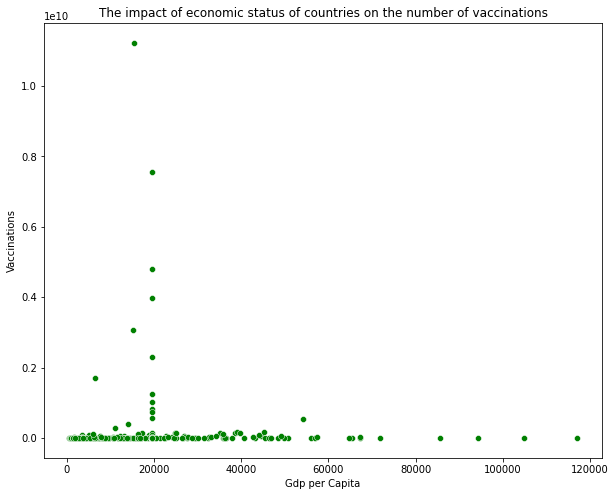

In [68]:
new_summarized = covid[["location", 'gdp_per_capita']]
new_summarized = new_summarized.groupby(by="location").max()
new_summarized = summarized.join(new_summarized)

plt.figure(figsize=(10,8))
ax = sns.scatterplot(x=new_summarized['gdp_per_capita'], y=new_summarized['new_vaccinations'], color='g')
ax.set_title("The impact of economic status of countries on the number of vaccinations")
ax.set_xlabel('Gdp per Capita')
ax.set_ylabel('Vaccinations')

plt.show()

Again, we can see that in most of range of GDP, total vaccinations doesn't change that much and wealth doesn't affect vaccination that much. This is because after some amount of time, most of coutries(independent of their wealth) tried to vaccinate their population with their power and help of stronger coutries and that helped vaccination speed and amount.

## Q8

Finally, let's see number of cases trend over 2021 by month!

In [69]:
covid_2021 = covid[covid['date'].dt.year == 2021]
covid_2021['month'] = covid_2021['date'].dt.month
covid_2021_summarized = covid_2021[["month", "new_cases"]]
covid_2021_summarized = covid_2021_summarized.groupby(by="month").sum()

/home/taha/.local/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



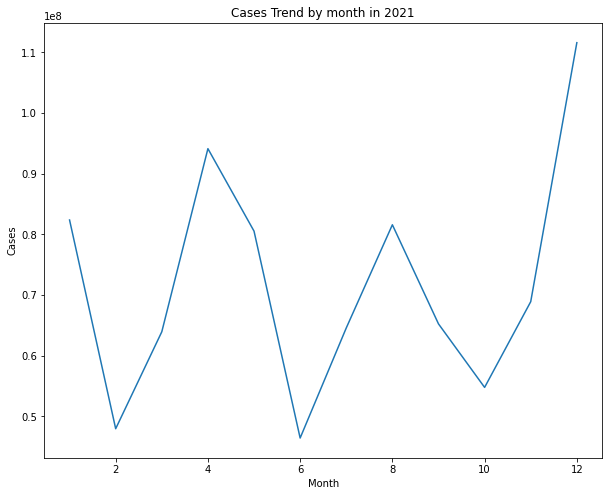

In [70]:
plt.figure(figsize=(10,8))
ax = sns.lineplot(x=covid_2021_summarized.index, y=covid_2021_summarized['new_cases'])
ax.set_title("Cases Trend by month in 2021")
ax.set_xlabel('Month')
ax.set_ylabel('Cases')
plt.show()

As you can see, there are many rises and falls in the plot. Once a new variant of virus spreads in the world, total number of cases rises, and scientist try to make new vaccines that is strong over this variant. Also strigency index helps coutries control new variants and this means a fall in total number of cases in world. As you can see, highest number of cases happened in December(probably because of Omicron) and least number of cases happened in June.

# Bonus

## Q1
Now let's see total number of deaths past 3 months over countries on world map using geopandas library!

In [71]:
last_3_months = covid[['location', 'new_deaths', 'population', 'date', 'iso_code']]

last_3_months = last_3_months.sort_values(by="date",ascending=True).set_index("date").last("3M")
last_3_months = last_3_months.reset_index()

last_3_months_deaths = last_3_months[["location", "new_deaths"]]
last_3_months_deaths = last_3_months_deaths.groupby(by="location").sum()
population = last_3_months[["location", "population", "iso_code"]]
population = population.groupby(by="location").max()
last_3_months = last_3_months_deaths.join(population)

last_3_months['death_per_pop'] = last_3_months['new_deaths'] / last_3_months['population']
last_3_months = last_3_months.drop(['new_deaths', 'population'], axis=1)
last_3_months = last_3_months.reset_index()
last_3_months = last_3_months.rename(columns={'location': 'name', 'iso_code' : 'CODE'})
last_3_months

,name,CODE,death_per_pop
0,Afghanistan,AFG,0.000007
1,Africa,OWID_AFR,0.000015
2,Albania,ALB,0.000089
3,Algeria,DZA,0.000013
4,Andorra,AND,0.000142
...,...,...,...
227,Wallis and Futuna,WLF,0.000000
228,World,OWID_WRL,0.000067
229,Yemen,YEM,0.000005
230,Zambia,ZMB,0.000012


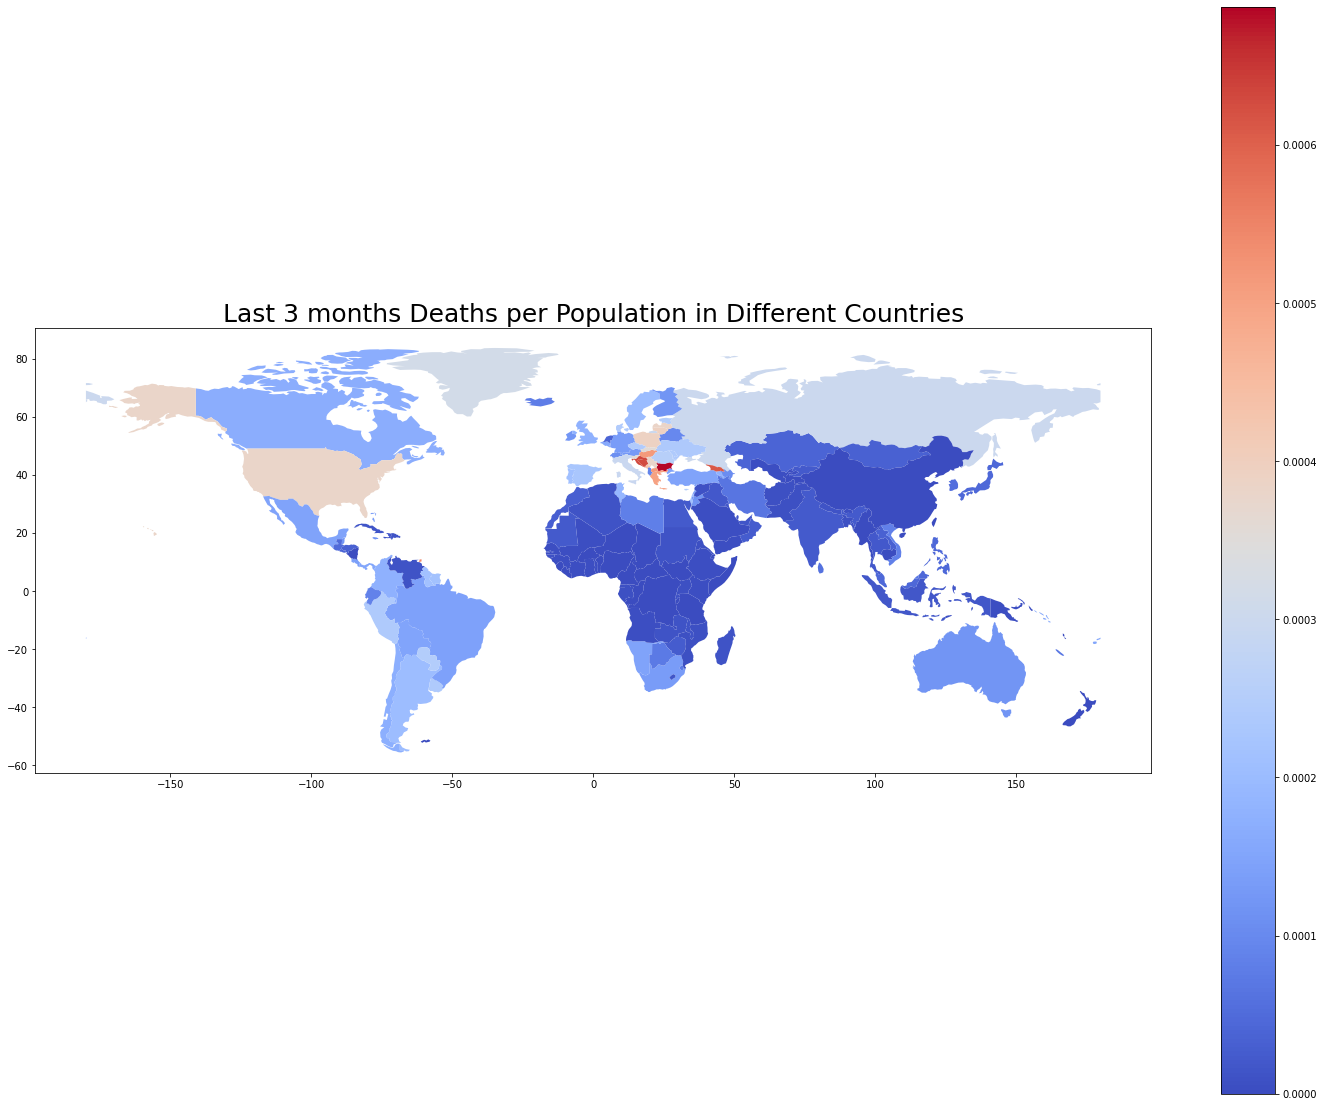

In [72]:
import geopandas
import matplotlib.pyplot as plt

world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
world.columns=['pop_est', 'continent', 'name', 'CODE', 'gdp_md_est', 'geometry']
merge=pd.merge(world, last_3_months, on='CODE')

merge.plot(column='death_per_pop',
           figsize=(25, 20),
           legend=True,cmap='coolwarm')
plt.title('Last 3 months Deaths per Population in Different Countries',fontsize=25)
plt.show()

## Q2
Finally, let's see number of deaths and vaccinations over weeks in years. We use a double bar chart to see the trend:

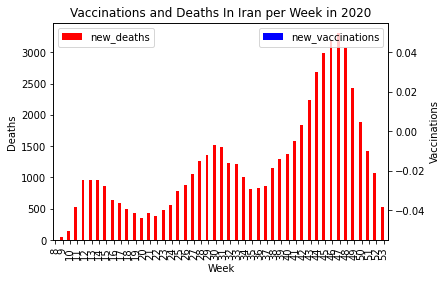

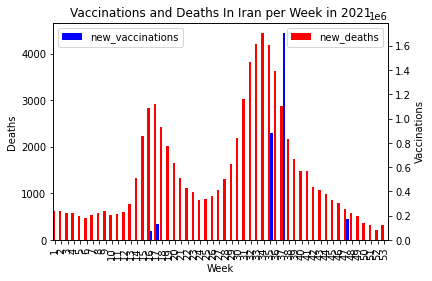

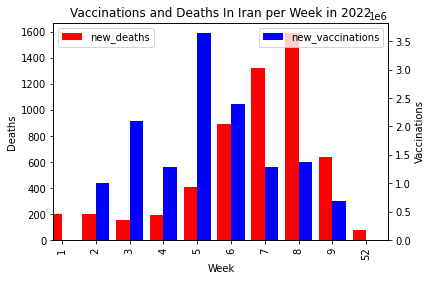

In [76]:
new_iran = iran.copy()
new_iran['week'] = new_iran['date'].dt.isocalendar().week

factors = ['new_deaths', 'new_vaccinations']
years = [2020, 2021, 2022]
for year in years:
    iran_year = new_iran[new_iran['date'].dt.year == year]
    iran_year_summarized = iran_year[['week'] + factors]
    iran_year_summarized = iran_year_summarized.groupby(by='week').sum()
    fig = plt.figure()

    ax = fig.add_subplot(111) 
    ax2 = ax.twinx()

    width = 0.4

    iran_year_summarized.new_deaths.plot(kind='bar', color='red', ax=ax, width=width, position=1)
    iran_year_summarized.new_vaccinations.plot(kind='bar', color='blue', ax=ax2, width=width, position=0)
    ax.set_title('Vaccinations and Deaths In Iran per Week in {}'.format(year))
    ax.set_ylabel('Deaths')
    ax2.set_ylabel('Vaccinations')
    ax.set_xlabel('Week')
    ax.legend()
    ax2.legend()
    plt.show()

As you can see, in the first year, there is't any vaccinations in Iran(there was no vaccines available past then) and there is an ascending trend in number of deaths over weeks. In next year, as number of vaccination increases, we see a fall in number of deaths, which means that vaccination could help country control COVID-19. Finally in last year, again number of deaths increased and number of vaccinations decreased, which probably means that country couldn't get enough vaccines for the new trend.